# Text Analytics - Project 2

**Requirement:**
You need to perform sentiment analysis using the following approaches and benchmark the
scores against distilbert-base-uncased-finetuned-sst-2-English:

**1. Lexicon-based Approach:**
Experiment with lexicon-based libraries to identify the best scoring model in this
category. Since there is no training involved, so you may directly evaluate the accuracy
of different lexicon-based libraries on test data.

**2. Classical Machine Learning Approaches:**
• Preprocess the text data using tokenization, stemming/lemmatization, POS Taggers
and stopword removal.
• Vectorize the text data using different variations of TF-IDF or CountVectorizer.
• Train different machine learning models (e.g., Naive Bayes, Random Forest, k-NN) on
the processed training dataset.
• Evaluate the accuracy of these models on the test data.

**3. Customized Word Embeddings:**
Same as task 2, but this time, train different machine learning models (e.g., Naive Bayes,
Random Forest, k-NN) on customized word embeddings. (Note: Word Embeddings will
be covered in Week 4)

**4. Fine-tuning Pre-trained Language Models (PLMs):**
• Fine-tune three different pre-trained language models (PLMs):
a) DistilBERT
b) RoBERTa
c) GPT-2
• The specific version of each model and their basic use is shown in a sample file
(named Task4-Programming Assignment) that is posted in the Python section of the
LMS.
• Fine-tuning refers to training a raw, pre-trained language model that hasn't been
optimized for any specific task on your dataset for sentiment analysis.
• There are many tutorials/blogs on fine-tuning different PLMs. A sample file (named
DistilledBERT FineTuning) demonstrating DistilledBERT-based finetuning is posted in
the Python section of the LMS.

**5. Hybrid Approach:**
Use innovative methods to combine different approaches for improved performance on
the test data. For example, combine lexicon-based, machine learning, embedding, or
PLM-based approaches, or any combination that yields better results.

**Contribution:**
* Task 1,2,3 Compiled by: Hammad Hadi Khan - 14278
* Task 4,5   Compiled by: Bilal Naseem - 
* Report     Compiled by: Hammad Hadi Khan and Bilal Naseem

### Importing Libraries and Dataset

In [86]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost

from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import wordnet
from afinn import Afinn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
stop_words = stopwords.words('english')

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix

from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter

import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
train_df=pd.read_csv('/kaggle/input/imdb-movie-reviews/train.csv')
test_df=pd.read_csv('/kaggle/input/imdb-movie-reviews/test.csv')

In [3]:
#train_df.shape
test_df.shape

(20000, 2)

## Exploratory Data Analysis 
### Bar plot of sentiment distribution

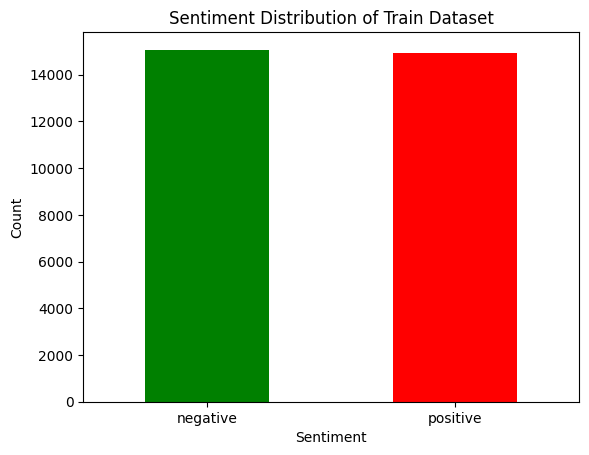

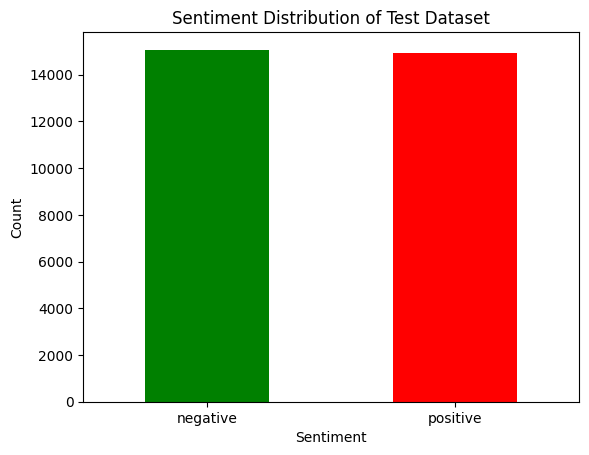

In [46]:
sentiment_distribution = train_df['sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution of Train Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

sentiment_distribution = train_df['sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution of Test Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### Sentiments Word Cloud

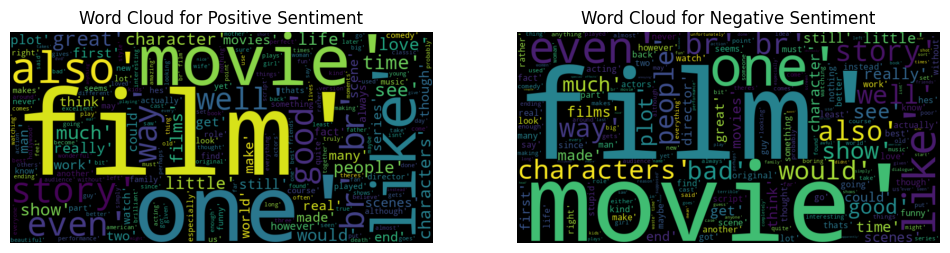

In [47]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiments for train dataset
positive_reviews = ' '.join(train_df[train_df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(train_df[train_df['sentiment'] == 'negative']['review'])

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.show()

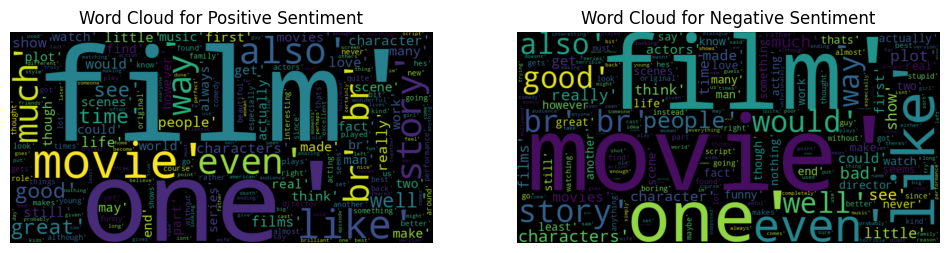

In [49]:
# Generate word clouds for positive and negative sentiments for test dataset
positive_reviews = ' '.join(test_df[test_df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(test_df[test_df['sentiment'] == 'negative']['review'])

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.show()

### Histogram of Review Lengths of Test and Train dataset

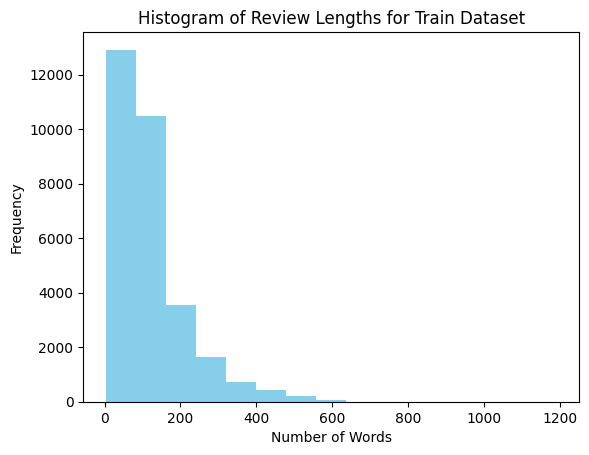

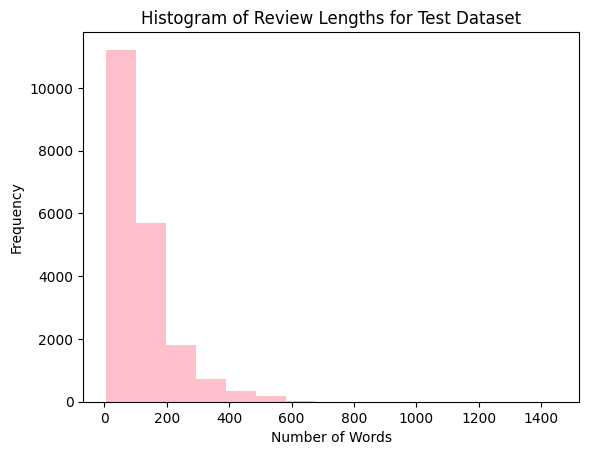

In [52]:
review_lengths = train_df['review'].apply(lambda x: len(x.split()))
plt.hist(review_lengths, bins=15, color='skyblue')
plt.title('Histogram of Review Lengths for Train Dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

review_lengths = test_df['review'].apply(lambda x: len(x.split()))
plt.hist(review_lengths, bins=15, color='pink')
plt.title('Histogram of Review Lengths for Test Dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


### Box Plot of Review Lengths by Sentiment

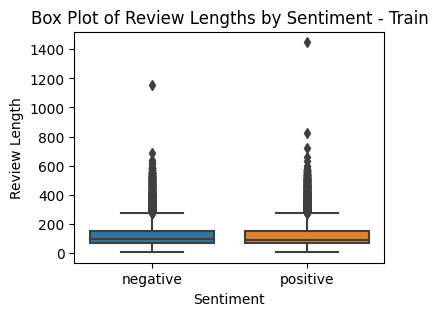

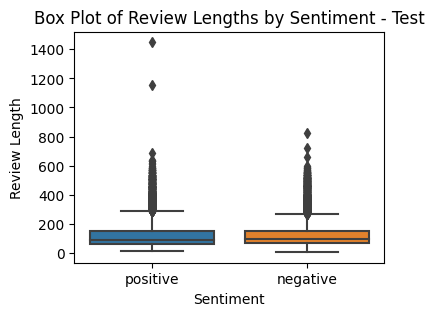

In [53]:
# Box plot of review lengths by sentiment
plt.figure(figsize=(4, 3))
sns.boxplot(x='sentiment', y=review_lengths, data=train_df)
plt.title('Box Plot of Review Lengths by Sentiment - Train')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

# Box plot of review lengths by sentiment
plt.figure(figsize=(4, 3))
sns.boxplot(x='sentiment', y=review_lengths, data=test_df)
plt.title('Box Plot of Review Lengths by Sentiment - Test')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


### Top N Most Frequent Words

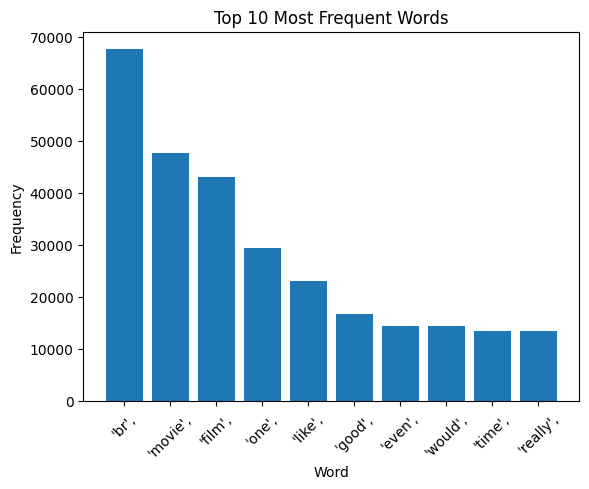

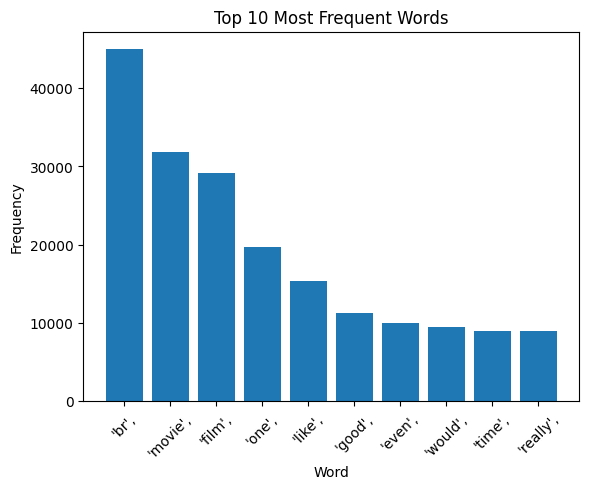

In [55]:
from collections import Counter

top_n = 10
all_words = ' '.join(train_df['review']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(top_n)

# Plot bar chart for top N most frequent words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

top_n = 10
all_words = ' '.join(test_df['review']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(top_n)

# Plot bar chart for top N most frequent words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Task 1 - **Lexicon-based Approach**

We utilize **TextBlob**, a Python library offering a simple API for various text processing tasks, including sentiment analysis.
It employs a combination of lexicon-based approach and machine learning techniques to assign polarity scores to text, facilitating quick and straightforward sentiment analysis.

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** serves as a powerful tool for sentiment analysis, specifically tailored for social media text. We rely on VADER's pre-built lexicon of words and their sentiment scores, along with its rule-based system designed to handle nuanced language patterns, enabling accurate sentiment analysis of text containing emoticons, slang, and punctuation.
NLTK Sentiment Intensity Analyzer:

We employ **NLTK's Sentiment Intensity Analyzer** , a lexicon-based approach provided by the NLTK library for sentiment analysis.
This tool enables us to determine the sentiment intensity of text by assigning scores based on the strength of positive and negative words, allowing for nuanced analysis of sentiment.

In [96]:
!pip install textblob
!pip install vaderSentiment
!pip install nltk

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer as NLTKSentimentIntensityAnalyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00a 0:00:01


### Lexicon based approach on Train dataset

In [99]:
# Function to convert polarity to sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Evaluate TextBlob on test data
textblob_correct = 0
for index, row in test_df.iterrows():
    blob = TextBlob(row['review'])
    predicted_label = get_sentiment_label(blob.sentiment.polarity)
    if predicted_label == row['sentiment']:
        textblob_correct += 1

textblob_accuracy = textblob_correct / len(train_df)
print(f'TextBlob Accuracy: {textblob_accuracy:.2%}')

# Evaluate VaderSentiment on test data
vader_correct = 0
analyzer = SentimentIntensityAnalyzer()
for index, row in test_df.iterrows():
    scores = analyzer.polarity_scores(row['review'])
    predicted_label = get_sentiment_label(scores['compound'])
    if predicted_label == row['sentiment']:
        vader_correct += 1

vader_accuracy = vader_correct / len(train_df)
print(f'VaderSentiment Accuracy: {vader_accuracy:.2%}')

# Evaluate NLTK on test data
nltk_correct = 0
nltk_analyzer = NLTKSentimentIntensityAnalyzer()
for index, row in test_df.iterrows():
    scores = nltk_analyzer.polarity_scores(row['review'])
    predicted_label = get_sentiment_label(scores['compound'])
    if predicted_label == row['sentiment']:
        nltk_correct += 1

nltk_accuracy = nltk_correct / len(train_df)
print(f'NLTK Accuracy: {nltk_accuracy:.2%}')

TextBlob Accuracy: 46.14%
VaderSentiment Accuracy: 46.82%
NLTK Accuracy: 46.63%


### Lexicon based approach on Test dataset

In [98]:
# Function to convert polarity to sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Evaluate TextBlob on test data
textblob_correct = 0
for index, row in test_df.iterrows():
    blob = TextBlob(row['review'])
    predicted_label = get_sentiment_label(blob.sentiment.polarity)
    if predicted_label == row['sentiment']:
        textblob_correct += 1

textblob_accuracy = textblob_correct / len(test_df)
print(f'TextBlob Accuracy: {textblob_accuracy:.2%}')

# Evaluate VaderSentiment on test data
vader_correct = 0
analyzer = SentimentIntensityAnalyzer()
for index, row in test_df.iterrows():
    scores = analyzer.polarity_scores(row['review'])
    predicted_label = get_sentiment_label(scores['compound'])
    if predicted_label == row['sentiment']:
        vader_correct += 1

vader_accuracy = vader_correct / len(test_df)
print(f'VaderSentiment Accuracy: {vader_accuracy:.2%}')

# Evaluate NLTK on test data
nltk_correct = 0
nltk_analyzer = NLTKSentimentIntensityAnalyzer()
for index, row in test_df.iterrows():
    scores = nltk_analyzer.polarity_scores(row['review'])
    predicted_label = get_sentiment_label(scores['compound'])
    if predicted_label == row['sentiment']:
        nltk_correct += 1

nltk_accuracy = nltk_correct / len(test_df)
print(f'NLTK Accuracy: {nltk_accuracy:.2%}')

TextBlob Accuracy: 69.22%
VaderSentiment Accuracy: 70.23%
NLTK Accuracy: 69.95%


## Task 2 - **Classical Machine Learning Approaches**

### Data Cleaning

In this report, we detail the steps taken to clean the dataset for sentiment analysis. The dataset contains movie reviews and is intended for use in training machine learning models. The cleaning process aims to remove redundancies such as HTML codes, URLs, emojis, stopwords, punctuations, and expand abbreviations. These steps are essential to ensure the quality and reliability of the dataset for subsequent analysis.

#### **Methodology:**
The dataset cleaning process involved the following steps, implemented using regular expressions (regex):

**Removal of HTML Codes:** HTML codes present in the text were identified and removed using regex patterns that match HTML tags and their content.

**Elimination of URLs:** URLs were detected using regex patterns and subsequently removed from the text to prevent them from influencing the sentiment analysis.

**Filtering Stopwords:** Stopwords, common words with little semantic value, were filtered out using predefined lists or libraries such as NLTK (Natural Language Toolkit).

**Elimination of Punctuations:** Punctuation marks were removed from the text using regex patterns to ensure uniformity and facilitate subsequent analysis.

**Expansion of Abbreviations:** Abbreviations were expanded to their full forms to improve readability and clarity of the text data. This process involved mapping abbreviations to their corresponding full forms.

In [4]:
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

train_df['review'] = train_df['review'].apply(remove_punctuations)
train_df['review'] = train_df['review'].apply(remove_html)
train_df['review'] = train_df['review'].apply(remove_url)

test_df['review'] = test_df['review'].apply(remove_punctuations)
test_df['review'] = test_df['review'].apply(remove_html)
test_df['review'] = test_df['review'].apply(remove_url)

In [5]:
def convert_lower(text):
    return text.lower()
train_df['review']=train_df['review'].apply(convert_lower)
test_df['review']=test_df['review'].apply(convert_lower)

In [6]:
def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

train_df['review']=train_df['review'].apply(remove_special)
test_df['review']=test_df['review'].apply(remove_special)

In [7]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

train_df['review']=train_df['review'].apply(remove_stopwords)
test_df['review']=test_df['review'].apply(remove_stopwords)

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus if not already downloaded
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_single_string(text):
    if isinstance(text, str):
        words = nltk.word_tokenize(text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_text = ' '.join(lemmatized_words)
        return lemmatized_text
    else:
        return text

# Apply lemmatization to the 'review' column in both train and test DataFrames
train_df['review'] = train_df['review'].apply(lemmatize_single_string)
test_df['review'] = test_df['review'].apply(lemmatize_single_string)


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Vectorize the text data
X_train = vectorizer.fit_transform(train_df['review'])
X_test = vectorizer.transform(test_df['review'])

y_train=train_df.iloc[:,-1].values
y_test=test_df.iloc[:,-1].values


In [14]:
# Get the target labels after initializing and training the classifiers
# Initialize and train the classifiers
clf1 = MultinomialNB()
clf1.fit(X_train, y_train) 

clf2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
clf2.fit(X_train, y_train)  

clf3 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
clf3.fit(X_train, y_train)  


RandomForestClassifier(random_state=42)

In [15]:
# Now predict using the trained classifiers
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [16]:
print("Multinomial NB accuracy=",accuracy_score(y_test,y_pred1))
print("KNN Classifier accuracy=",accuracy_score(y_test,y_pred2))
print("Random Forest Classifier accuracy=",accuracy_score(y_test,y_pred3))

Multinomial NB accuracy= 0.8587
KNN Classifier accuracy= 0.7372
Random Forest Classifier accuracy= 0.84595


## Vectorization and Embedding

### TF-IDF Vectorization and Count Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) and Count Vectorization are two commonly used techniques for converting text data into numerical vectors, which can be used as input for machine learning algorithms. In this section, we will explore and implement both vectorization strategies on our corpus.

**TF-IDF Vectorization:**
TF-IDF works by calculating a weight for each term in a document based on its frequency (TF) and inverse document frequency (IDF). The TF-IDF weight increases with the frequency of the term in the document, but is offset by the frequency of the term in the entire corpus. The formulation is as follows:

TF-IDF=TF(t,d)×IDF(t,D)
Where:

TF(t, d) represents the term frequency of term t in document d.
IDF(t, D) represents the inverse document frequency of term t in the corpus D.

**Count Vectorization:**
Count Vectorization is a simpler technique that represents each document as a vector of term frequencies. Each element of the vector corresponds to the frequency of a particular term in the document. The dimensionality of the vector is equal to the vocabulary size of the corpus.

**Implementation:**
We implemented TF-IDF and Count Vectorization on our corpus and examine the dimensionality of the resulting vectors.

In [17]:
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(train_df['review'].values.tolist())
train_tfidf.shape

(30000, 5180121)

In [18]:
'''Converting the labels into binary (1,0) values,
which will be helpful when we apply tensor compression or dimensionality reduction algorithms
for visualizing the vectors.
'''

train_li=[]
for i in range(len(train_df)):
    if (train_df['sentiment'][i]=='positive'):
        train_li.append(1)
    else:
        train_li.append(0)
train_df['Binary']=train_li
train_df.head()

,review,sentiment,Binary
0,"['saps', 'sea', 'br', 'br', 'aspect', 'ratio',...",negative,0
1,"['want', 'mindless', 'action', 'hot', 'chicks'...",positive,1
2,"['woman', 'black', 'easily', 'one', 'creepiest...",positive,1
3,"['barely', 'find', 'words', 'describe', 'much'...",negative,0
4,"['whats', 'let', 'tell', 'presence', 'alec', '...",negative,0


                                              review sentiment  Binary
0  ['saps', 'sea', 'br', 'br', 'aspect', 'ratio',...  negative       0
1  ['want', 'mindless', 'action', 'hot', 'chicks'...  positive       1
2  ['woman', 'black', 'easily', 'one', 'creepiest...  positive       1
3  ['barely', 'find', 'words', 'describe', 'much'...  negative       0
4  ['whats', 'let', 'tell', 'presence', 'alec', '...  negative       0


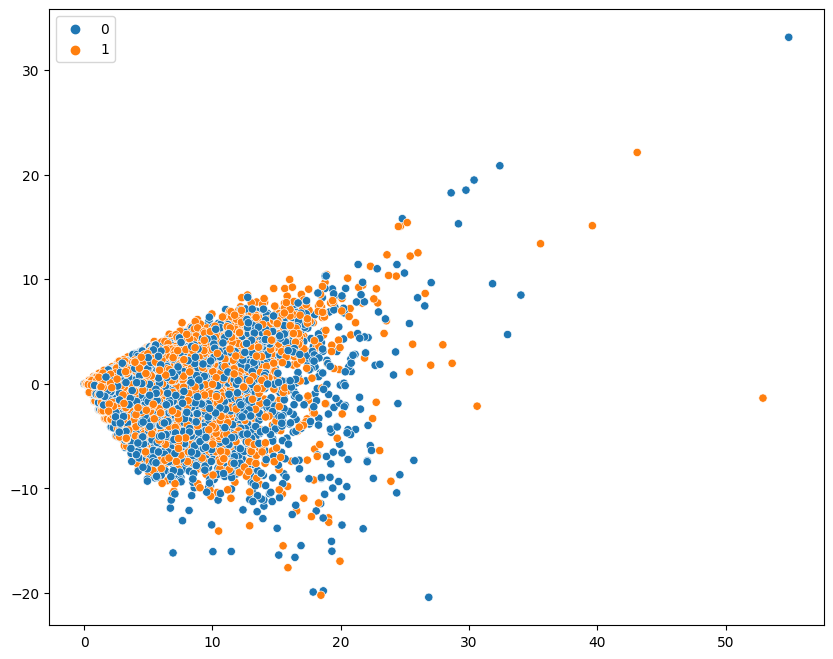

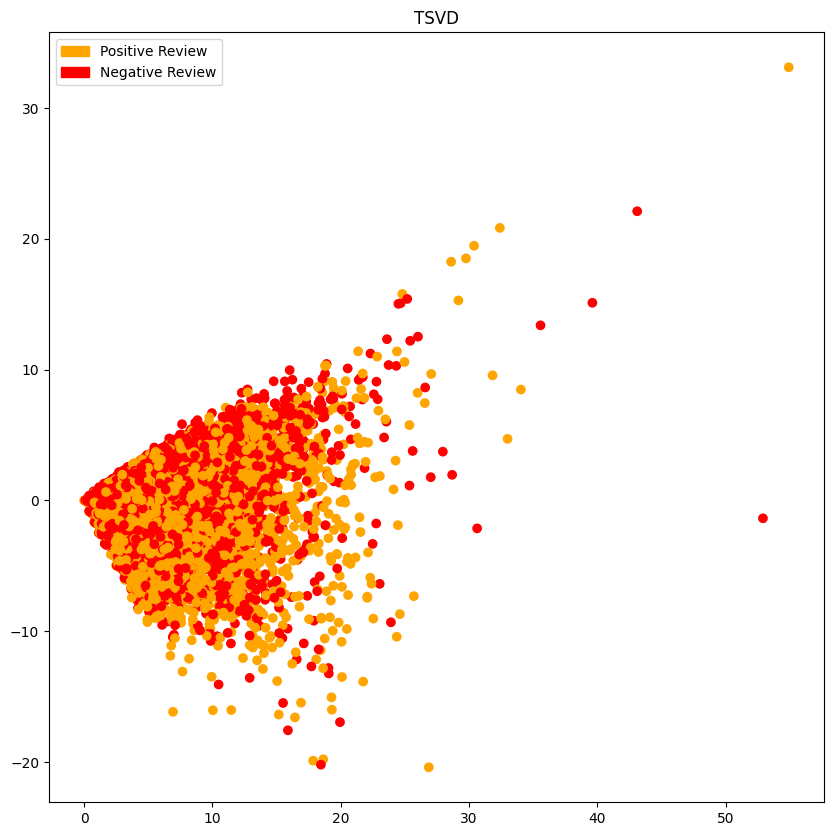

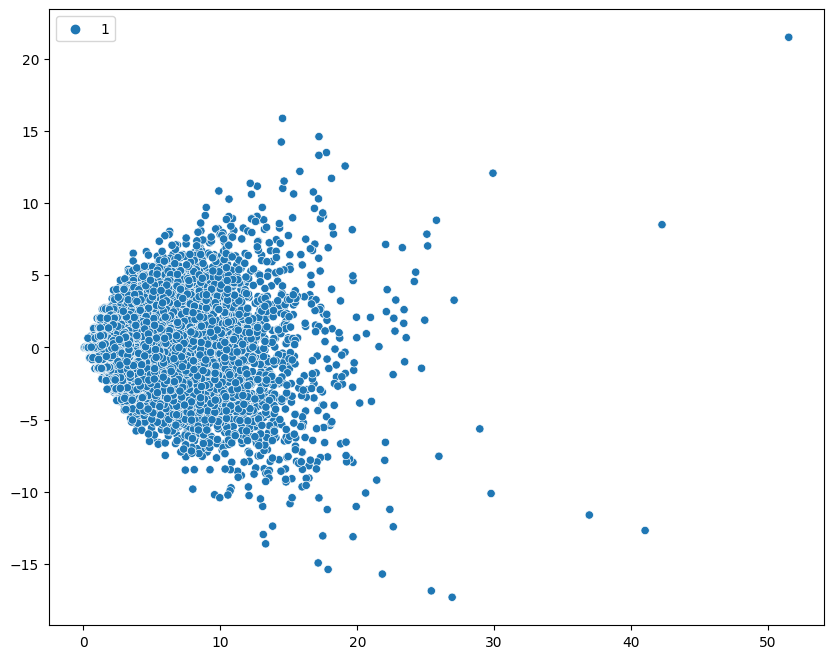

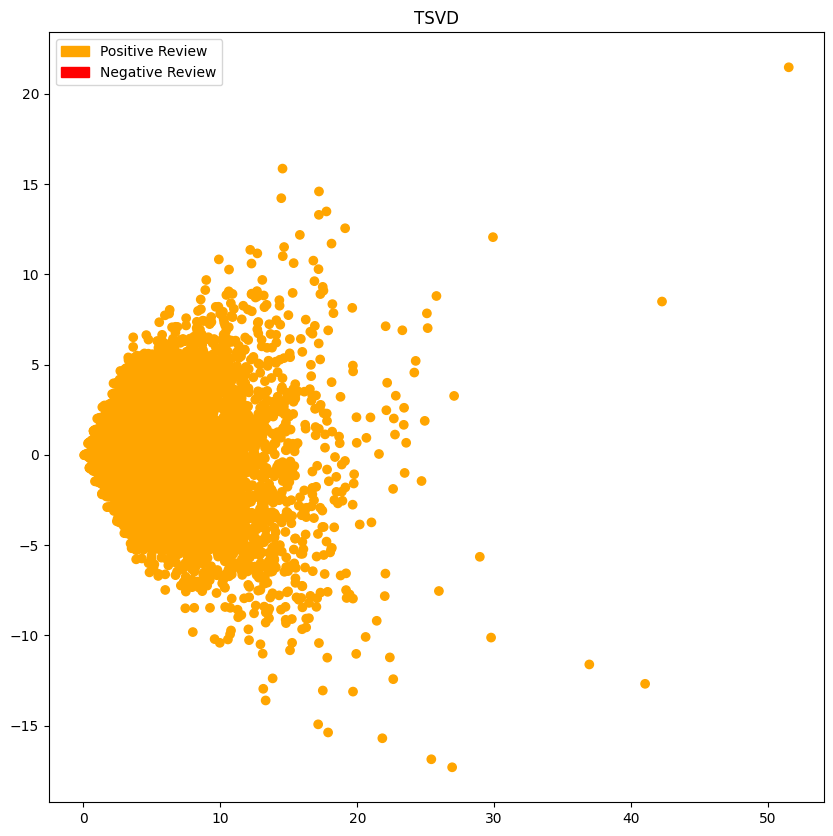

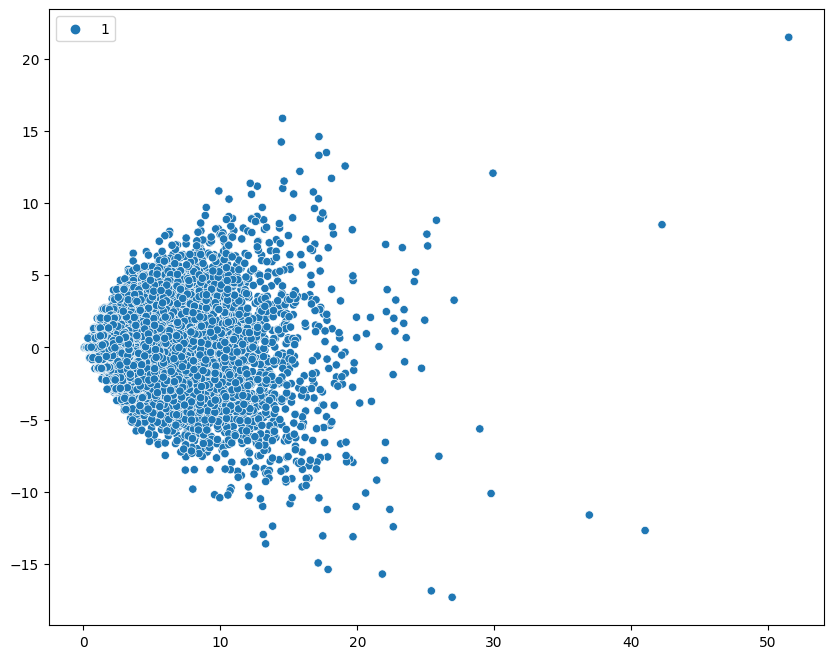

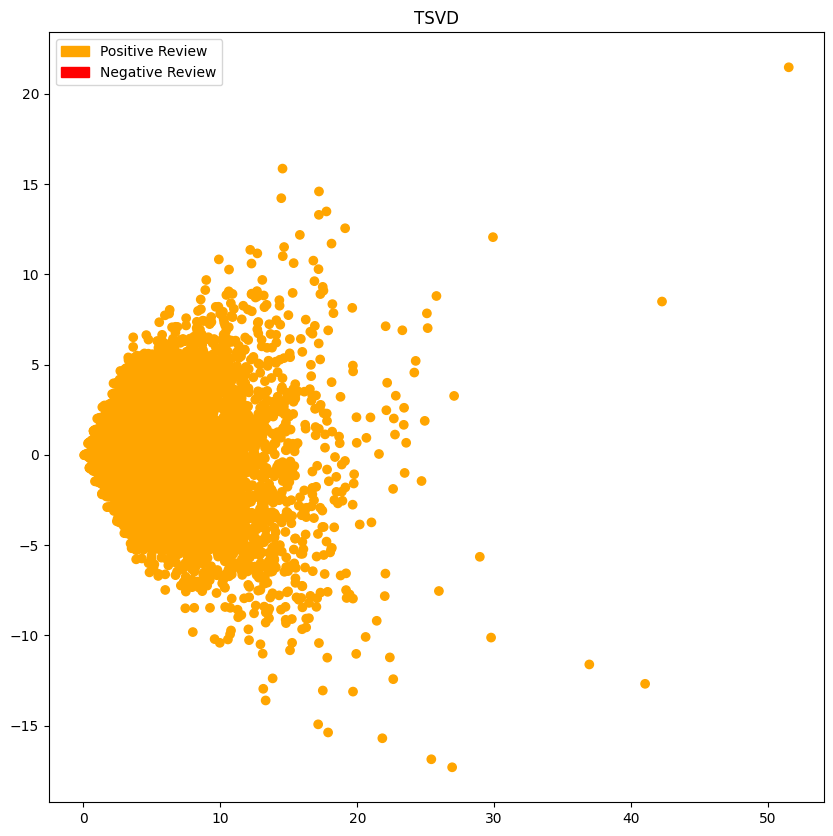

In [20]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']

#Count Vectorization
import matplotlib
import matplotlib.pyplot as plt
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv

#Tfidf vectorization from sklearn
def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_cv,tfidfv

def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label        )
        
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negtive Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show()
train_data=train_df       
data_vect=train_data['review'].values
data_vect_good=count_good['review'].values
target_vect=train_data['Binary'].values
target_data_vect_good=train_df[train_df['sentiment']=='positive']['Binary'].values
data_vect_bad=count_bad['review'].values
target_data_vect_bad=train_df[train_df['sentiment']=='positive']['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)

print(train_data.head())
dimen_reduc_plot(train_data_cv,target_vect,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)

## Task 3 - **Customized Word Embedding**

Word embeddings are numerical representations of words in vector space. They capture the semantic meaning of words by representing them as dense vectors, where similar words are located closer to each other in the vector space. Word embeddings are widely used in natural language processing tasks, including sentiment analysis, text classification, and machine translation.

**Similarity Measurement:** Word embeddings enable us to measure the similarity between words based on their vector representations. This can be done using metrics such as cosine similarity or Euclidean distance. Similar words have vectors that are close to each other in the vector space.

**Distance Measurement:** Similar to similarity measurement, distance metrics such as Euclidean distance or cosine distance can be applied to word vectors to measure the distance between words. Words that are semantically similar tend to have smaller distances between their vectors.

**Numerical Transformations:** Word embeddings allow for numerical transformations of word vectors, such as addition, subtraction, or multiplication. These operations can yield interesting insights, such as finding analogies or completing analogical reasoning tasks.

### **Word2Vec: Skip-gram and CBOW Models**
Our group explored Word2Vec, a popular word embedding technique, which learns distributed representations of words in a continuous vector space. By representing each word as a dense vector, Word2Vec captures semantic relationships between words, enabling various natural language processing tasks.

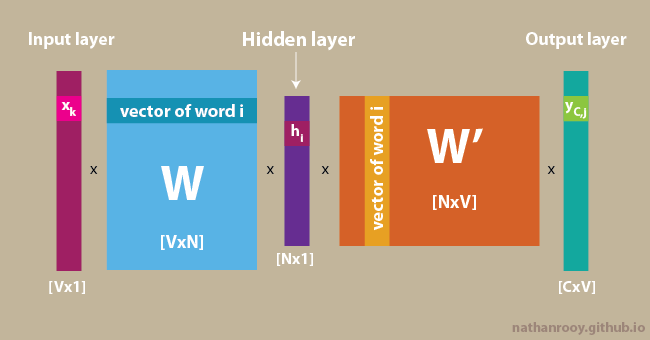

**Skip-gram Model:**
Our group delved into the Skip-gram model, one of the architectures used by Word2Vec. In this model, we aimed to predict context words given a target word. By maximizing the probability of context words given the target word, the Skip-gram model effectively captured syntactic relationships between words, particularly in scenarios with large vocabularies.

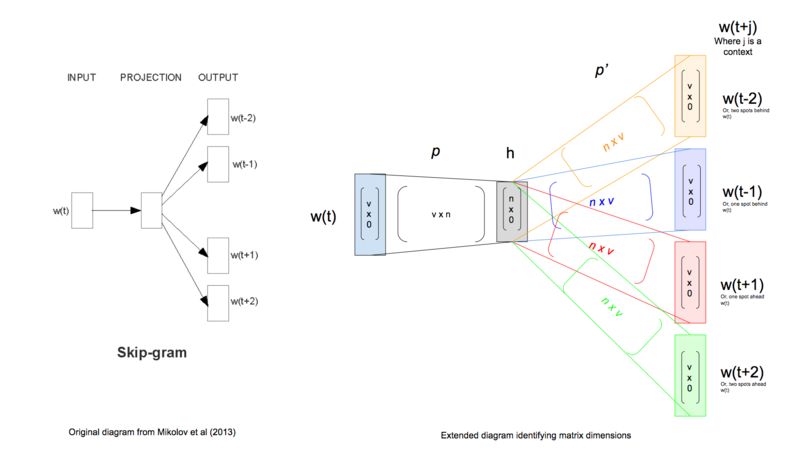

**Continuous Bag of Words (CBOW) Model:**
We also explored the Continuous Bag of Words (CBOW) model, another architecture used by Word2Vec. In this model, our objective was to predict the target word given a context of surrounding words. By maximizing the probability of the target word given the context words, the CBOW model effectively captured semantic relationships between words, especially when the context provided rich information about the target word.
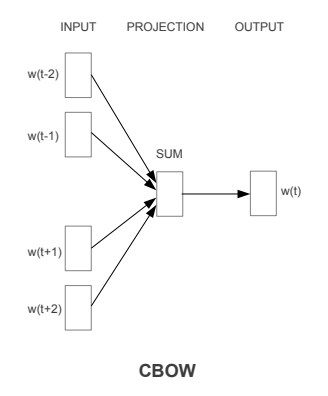

**Gensim Implementation:**
Our group utilized Gensim, a Python library, to train and utilize Word2Vec models seamlessly. Gensim provided convenient classes and functions to build, train, and utilize Word2Vec models, abstracting away the implementation details and enabling us to focus on our specific tasks without the need to worry about the underlying algorithms.

In [23]:
from gensim.models import Word2Vec,KeyedVectors
check_df=list(train_df['review'].str.split())
model=Word2Vec(check_df,min_count=1)
word_li = list(model.wv.index_to_key)


["'br',", "'movie',", "'film',", "'one',", "'like',"]


We used **cosine distance measurement** to determine the closeness of two word vectors in a vector space. It measures the cosine of the angle between the vectors, indicating the similarity between the words they represent. When plotting word vectors using matplotlib, the resulting graphs often resemble electrocardiogram (ECG) diagrams. This is due to the analysis of each word based on the number of words in its surrounding context.

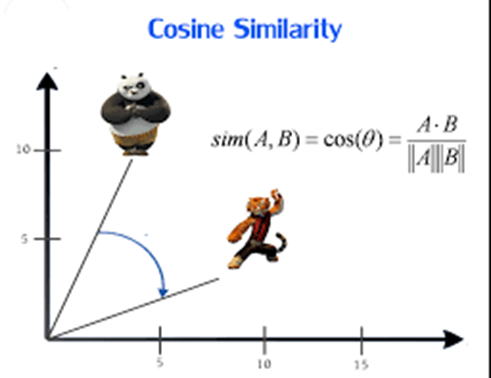

In [35]:
distance = model.wv.similarity("'movie',", "'film',")
print(distance)

0.8186855


Word2Vec<vocab=146917, vector_size=100, alpha=0.025>


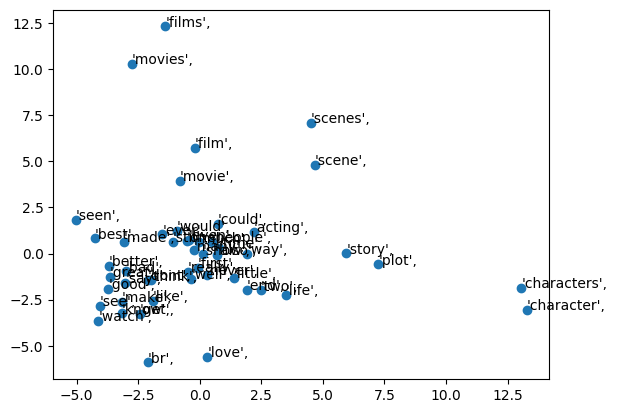

In [39]:
# PCA transform in 2D for visualization of embedded words
from gensim.models import Word2Vec

model.save('word2vec_model.bin')
loaded_model = Word2Vec.load('word2vec_model.bin')
print(loaded_model)


words = list(loaded_model.wv.index_to_key)
transformation_model = [loaded_model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(transformation_model[:50])

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Evaluation of Machine Learning Models:
Furthermore, our group assessed the performance of various machine learning models, including KNN, Random Forest, and Logistic Regression, on the task at hand. We calculated the accuracy of each model to gauge its effectiveness in classifying text data based on word embeddings generated using Word2Vec. This evaluation provided valuable insights into the suitability of different classifiers for sentiment analysis and other text analytics tasks.

In [43]:
model = Word2Vec.load('word2vec_model.bin')

X = []
y = train_df['Binary']  

# Iterate over each review in the DataFrame and calculate its embedding
for review in train_df['review']:
    # Convert review to embedding by averaging word embeddings
    review_embedding = np.mean([model.wv[word] for word in review.split() if word in model.wv], axis=0)
    X.append(review_embedding)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

# Train and evaluate KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Train and evaluate Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

Logistic Regression Accuracy: 0.8400
KNN Accuracy: 0.7815
Random Forest Accuracy: 0.8122
